

# A forecast of the impact of AI and Crypto Minning in Global Energy Consumption


A predictive modelling of the future impact of AI and Crypto Mining in the world energy cnsumption.


## Content

* [1. Problem Statement](#0)
* [2. Getting Started - Load Libraries and Dataset](#1)
    * [2.1. Load Libraries](#1.1)    
    * [2.2. Load Dataset](#1.2)
* [3. Exploratory Data Analysis](#2)
    * [3.1 Descriptive Statistics](#2.1)    
    * [3.2. Data Visualisation](#2.2)
* [4. Data Preparation](#3)
    * [4.1 Data Cleaning](#3.1)
    * [4.3.Feature Selection](#3.2)
    * [4.3.Data Transformation](#3.3)
        * [4.3.1 Rescaling ](#3.3.1)
        * [4.3.2 Standardization](#3.3.2)
        * [4.3.3 Normalization](#3.3.3)    
* [5.Evaluate Algorithms and Models](#4)        
    * [5.1. Train/Test Split](#4.1)
    * [5.2. Test Options and Evaluation Metrics](#4.2)
    * [5.3. Compare Models and Algorithms](#4.3)
        * [5.3.1 Common Regression Models](#4.3.1)
        * [5.3.2 Ensemble Models](#4.3.2)
        * [5.3.3 Deep Learning Models](#4.3.3)  
    * [5.4. Time Series based Models-ARIMA and LSTM](#4.4)
        * [5.4.1 ARIMA Model](#4.4.1)
        * [5.4.2 LSTM Model](#4.4.2)
* [6. Model Tuning and Grid Search](#5)
    * [6.1 Common Regression, Ensemble and DeepNNRegressor Grid Search](#5.1)
    * [6.2 ARIMA and LSTM Grid Search](#5.2)
* [7. Finalize the Model](#6)  
    * [7.1. Results on test dataset](#6.1)
    * [7.1. Variable Intuition/Feature Selection](#6.2)
    * [7.3. Save model for later use](#6.3)


<a id='0'></a>
# 1. Problem Statement

The goal in this jupyter notebook is to create a pipeline to analyze the problem of enegy consumption prediction in the next 10 years, evaluating the increase in demand by AI and Minning of Crypto currencies.
The pipeline is based on the following steps:
- Load the data avaliable in csv files and other sources from IEA (International Energy Agency) https://www.iea.org/
- Transform the data applying the required formats and merging the datasets
- Plot and analyze the statistics to understand patterns and prepare data to training in machine learning models
- Apply ensemble methods and tuning of ensemble methods to improve model performance.
- The Following Models are implemented and evaluated

    * Ada Boost
    * Gradient Boosting Method
    * Random Forest
    * Extra Trees
    * Neural Network - Shallow - Using sklearn
    * Deep Neural Network - Using Keras
- Time Series Models
    * ARIMA Model
    * LSTM - Using Keras
    

<a id='1'></a>
# 2. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 2.1. Loading the python packages

In [79]:
# Load libraries
import numpy as np
import pandas as pd
from datetime import datetime
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from scikeras.wrappers import KerasClassifier

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

<a id='1.2'></a>
## 2.2. Loading the Data

In [80]:
# load dataset

world = pd.read_excel('World Energy Balances Highlights 2024.xlsx', sheet_name='TimeSeries_1971-2023', header=1)

In [81]:
# Transforming the datasets
world = world[(world.Country == 'World') & (world.Product == 'Total') & (world.Flow == 'Total final consumption (PJ)')].iloc[:,6:world.shape[1]-1]

world = world.T

world.reset_index(inplace=True)

world.columns = ['Year','Consumption']

# world['Year'] = pd.to_datetime(world['Year'], format='%Y')

# Converting the Energy Consumption from PJ to TWh to annalyze the data in the same base of Crypto Minning and Data Centre Energy Consumption
world['Consumption'] = pd.to_numeric(world['Consumption']) * 0.27778

In [82]:
world.head()

,Year,Consumption
0,1971,48759.010
1,1972,51054.404
2,1973,53542.732
3,1974,53471.034
4,1975,53955.820


In [83]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

<a id='2'></a>
# 3. Exploratory Data Analysis

<a id='2.1'></a>
## 3.1. Descriptive Statistics

In [84]:
# World Energy shape
world.shape

(52, 2)

In [85]:
# World Energy types
pd.set_option('display.max_rows', 500)
world.dtypes

Year             int64
Consumption    float64
dtype: object

In [86]:
# describe World Energy data
pd.set_option('display.precision', 3)
world.describe()

,Year,Consumption
count,52.000,52.000
mean,1996.500,80904.552
std,15.155,20376.505
min,1971.000,48759.010
25%,1983.750,63170.737
50%,1996.500,76582.896
75%,2009.250,98288.915
max,2022.000,117183.552


<a id='2.2'></a>
## 3.2. Data Visualization

In [87]:
# Plotting individual charts to analyze the patterns - World Energy Consumption
fig = px.line(world, x='Year', y=['Consumption'], color_discrete_sequence=['blue'], title="Total World Energy Consumption", height=500, width=1000)
fig.show()

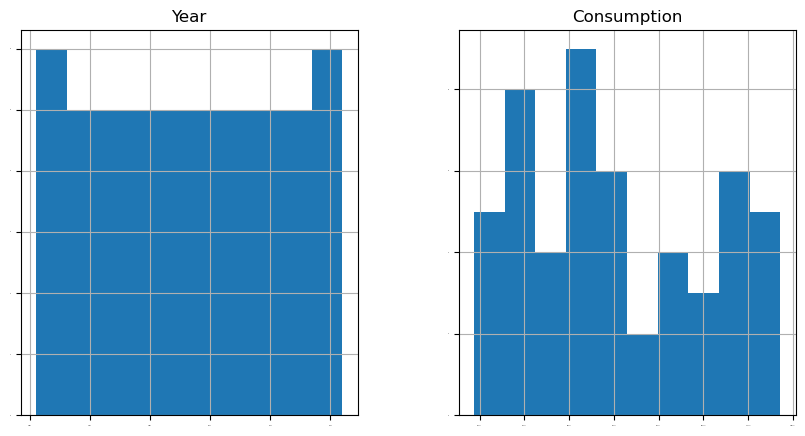

In [88]:
# histograms
world.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(10,5))

pyplot.show()

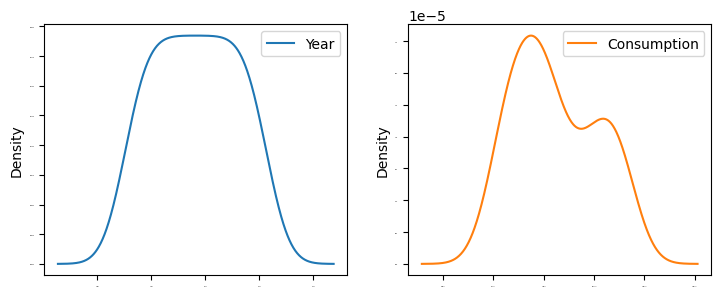

In [89]:
# density
world.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(18,15))
pyplot.show()

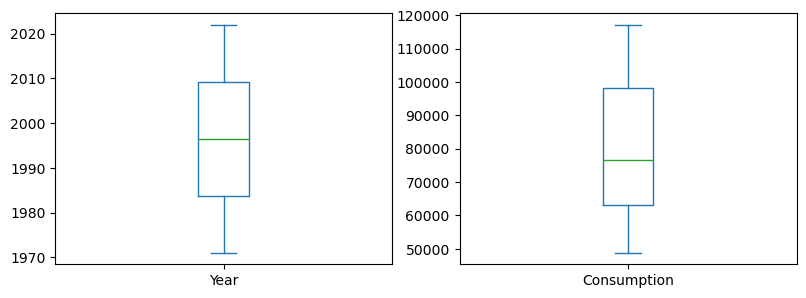

In [90]:
#Box and Whisker Plots
world.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(20,15))
pyplot.show()

<Figure size 1200x1200 with 0 Axes>

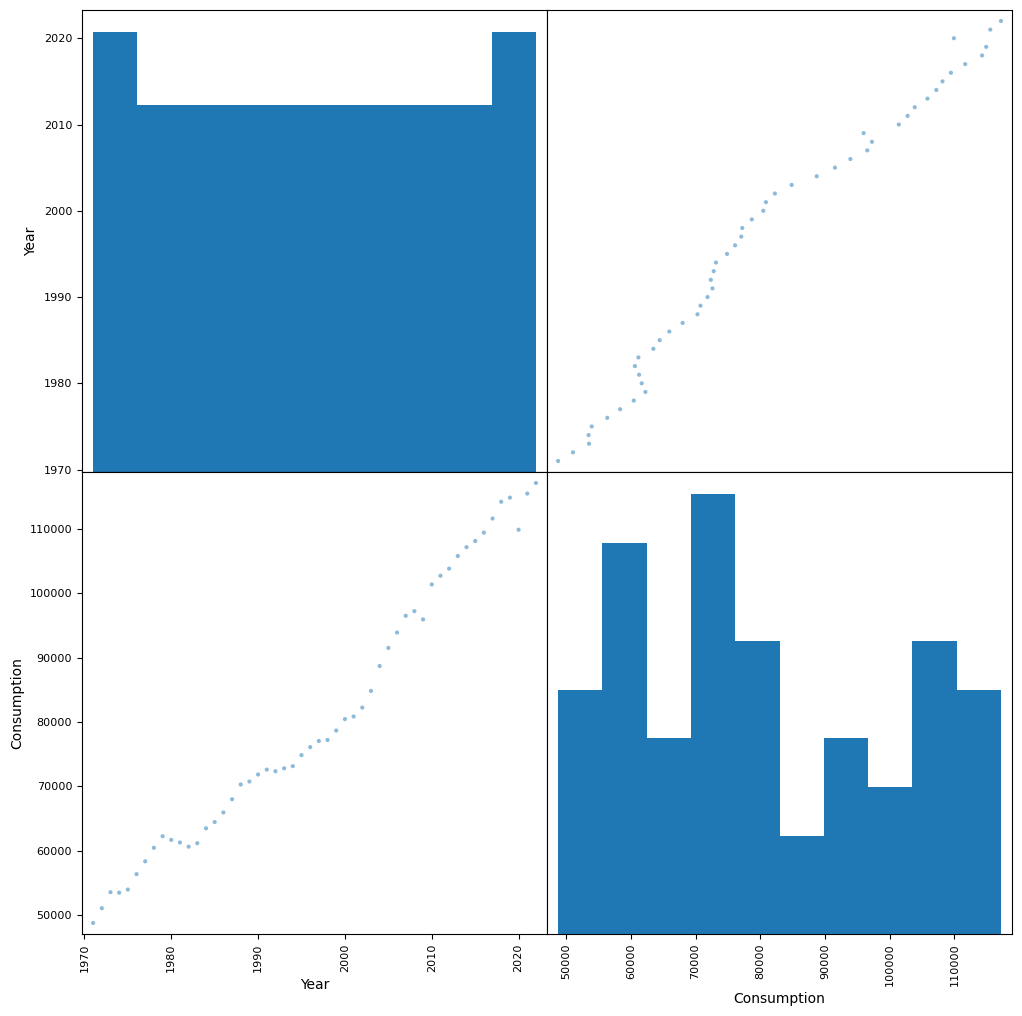

In [91]:
# Scatterplot Matrix
from pandas.plotting import scatter_matrix
pyplot.figure(figsize=(12,12))
scatter_matrix(world,figsize=(12,12))
pyplot.show()

<a id='2.3'></a>
## 3.3. Time Series Analysis

Time series broken down into different time series comonent

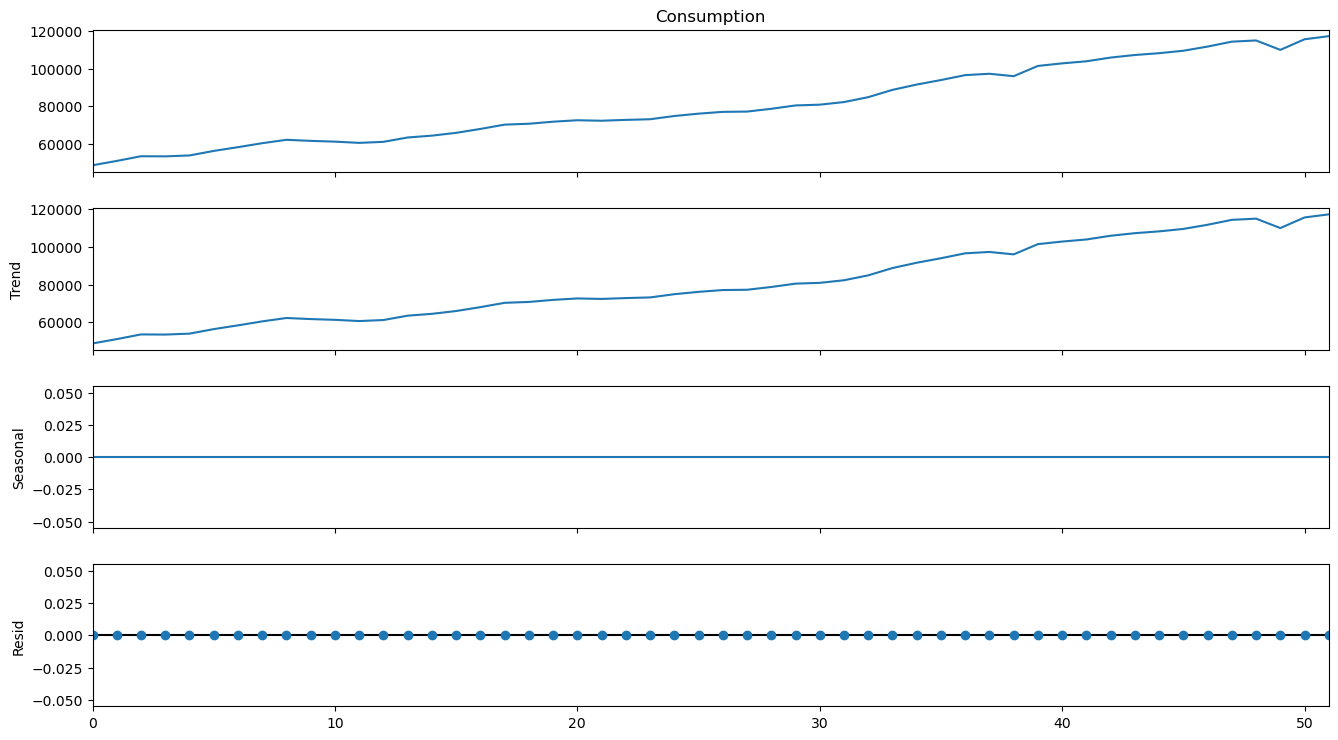

In [92]:
Y= world["Consumption"]
res = sm.tsa.seasonal_decompose(Y, period=1)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

<a id='3'></a>
## 4. Data Preparation

<a id='3.1'></a>
## 4.1. Data Cleaning
Check for the NAs in the rows, either drop them or fill them with the mean of the column

In [93]:
#Checking for any null values and removing the null values'''
print('Null Values =',world.isnull().values.any())

Null Values = False


Given that there are null values drop the rown contianing the null values.

In [94]:
# Drop the rows containing NA
#dataset.dropna(axis=0)
# Fill na with 0
#dataset.fillna('0')

#Filling the NAs with the mean of the column.
#dataset['col'] = dataset['col'].fillna(dataset['col'].mean())

<a id='3.3'></a>
## 4.3. Spliting train and validation set

In [95]:
Yw = world['Consumption']
Xw = world.loc[:,world.columns != 'Consumption']

<a id='3.4'></a>
## 4.4. Data Transformation

<a id='3.4.1'></a>
### 4.4.1. Rescale Data
When your data is comprised of attributes with varying scales, many machine learning algorithms
can benefit from rescaling the attributes to all have the same scale. Often this is referred to
as normalization and attributes are often rescaled into the range between 0 and 1.

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledXw = pd.DataFrame(scaler.fit_transform(Xw))
# summarize transformed data
rescaledXw.head(5)

,0
0,0.000
1,0.020
2,0.039
3,0.059
4,0.078


<a id='3.4.2'></a>
### 4.4.2. Standardize Data
Standardization is a useful technique to transform attributes with a Gaussian distribution and
differing means and standard deviations to a standard Gaussian distribution with a mean of
0 and a standard deviation of 1.

In [97]:
from sklearn.preprocessing import StandardScaler
scaler_w = StandardScaler().fit(Xw)
StandardisedX_w = pd.DataFrame(scaler_w.fit_transform(Xw))
# summarize transformed data
StandardisedX_w.head(5)

,0
0,-1.699
1,-1.632
2,-1.566
3,-1.499
4,-1.433


<a id='3.4.3'></a>
### 4.4.1. Normalize Data
Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called
a unit norm or a vector with the length of 1 in linear algebra).

In [98]:
from sklearn.preprocessing import Normalizer
scaler_w = Normalizer().fit(Xw)
NormalizedX_w = pd.DataFrame(scaler_w.fit_transform(Xw))
# summarize transformed data
NormalizedX_w.head(5)

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


<a id='4'></a>
# 5. Evaluate Algorithms and Models

<a id='4.1'></a>
## 5.1. Train Test Split

In [99]:
# split out validation dataset for the end

validation_size = 0.2

#In case the data is not dependent on the time series, then train and test split randomly
seed = 7
# X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#In case the data is not dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size_w = int(len(Xw) * (1-validation_size))
X_train_w, X_validation_w = Xw[0:train_size_w], Xw[train_size_w:len(Xw)]
Y_train_w, Y_validation_w = Yw[0:train_size_w], Yw[train_size_w:len(Xw)]

<a id='4.2'></a>
## 5.2. Test Options and Evaluation Metrics


In [100]:
# test options for regression
num_folds = 8
scoring = 'neg_mean_squared_error'
#scoring ='neg_mean_absolute_error'
#scoring = 'r2'

<a id='4.3'></a>
## 5.3. Compare Models and Algorithms

<a id='4.3.1'></a>
### 5.3.1. Common Models

In [101]:
# spot check the algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
#Neural Network
#models.append(('MLP', MLPRegressor()))

<a id='4.3.2'></a>
### 5.3.2. Ensemble Models

In [102]:
#Ensable Models
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

<a id='4.3.3'></a>
### 5.3.3. Deep Learning Model-NN Regressor

In [103]:
#Running deep learning models and performing cross validation takes time
#Set the following Flag to 0 if the Deep LEarning Models Flag has to be disabled
EnableDeepLearningRegreesorFlag = 0

def create_model(neurons=12, activation='relu', learn_rate = 0.01, momentum=0):
        # create model
        model = Sequential()
        model.add(Dense(neurons, input_dim=X_train.shape[1], activation=activation))
        #The number of hidden layers can be increased
        model.add(Dense(2, activation=activation))
        # Final output layer
        model.add(Dense(1, kernel_initializer='normal'))
        # Compile model
        optimizer = SGD(lr=learn_rate, momentum=momentum)
        model.compile(loss='mean_squared_error', optimizer='adam')
        return model

In [104]:
#Add Deep Learning Regressor
if ( EnableDeepLearningRegreesorFlag == 1):
    models.append(('DNN', KerasRegressor(build_fn=create_model, epochs=100, batch_size=100, verbose=1)))


### K-folds cross validation - World

In [105]:
results_w = []
names_w = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    #converted mean square error to positive. The lower the beter
    cv_results_w = -1* cross_val_score(model, X_train_w, Y_train_w, cv=kfold, scoring=scoring)
    results_w.append(cv_results_w)
    names_w.append(name)
    msg = "%s: %f (%f)" % (name, cv_results_w.mean(), cv_results_w.std())
    print(msg)

LR: 8219516.370802 (4791118.779514)
LASSO: 8219537.070031 (4791359.197577)
EN: 8232554.819536 (4933873.467014)
KNN: 4046363.454369 (3226062.064229)
CART: 3517824.042877 (2089141.276680)
SVR: 213684468.694785 (94270604.352911)
ABR: 3742882.028982 (1867512.203267)
GBR: 3515507.459284 (2081738.819932)
RFR: 2013921.949576 (1633267.632539)
ETR: 888593.637449 (683729.319996)


### Algorithm comparison

The chart shows MSE. Lower the MSE, better is the model performance.

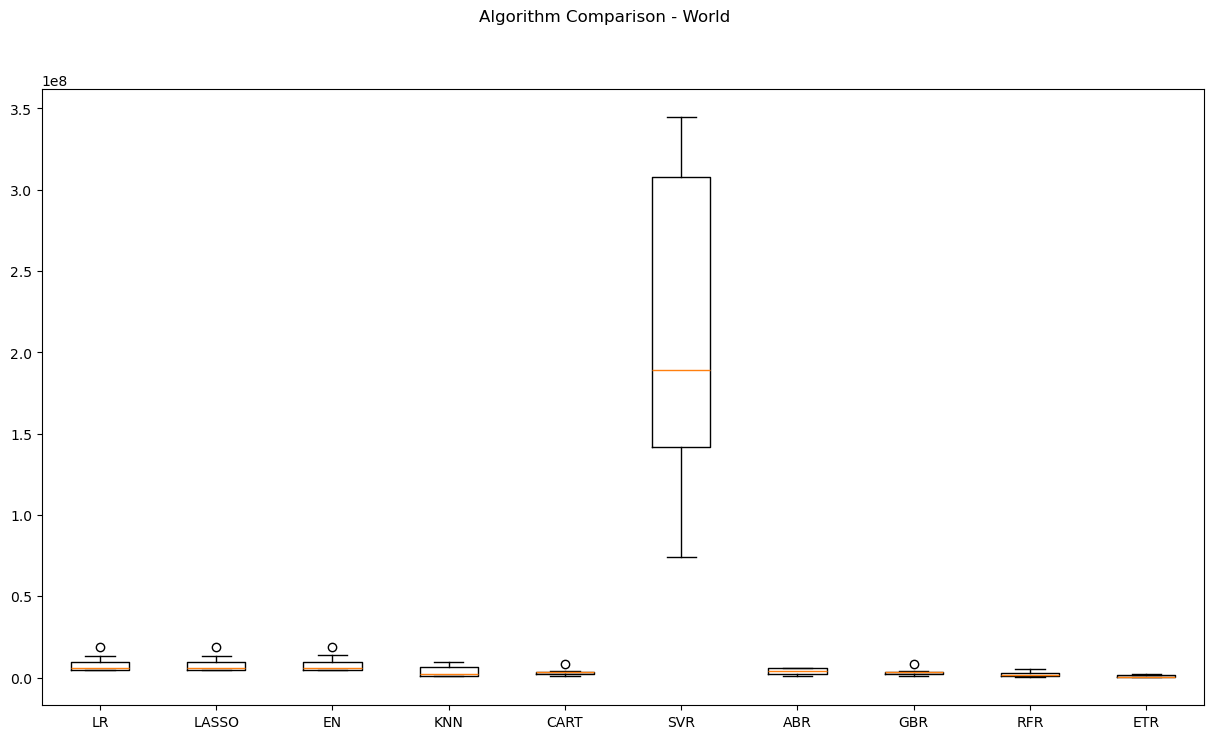

In [106]:
# compare algorithms - World
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison - World')
ax = fig.add_subplot(111)
pyplot.boxplot(results_w)
ax.set_xticklabels(names_w)
fig.set_size_inches(15,8)
pyplot.show()

<a id='4.4'></a>
## 5.4. Time Series based Models- ARIMA and LSTM

<a id='4.4.1'></a>
### 5.4.1 Time Series Model - ARIMA Model

In [107]:
#Preparing data for the ARIMAX Model, seperating endogeneous and exogenous variables
#World
X_train_ARIMA_w = X_train_w
X_validation_ARIMA_w = X_validation_w
tr_len_w = len(X_train_ARIMA_w)
te_len_w = len(X_validation_ARIMA_w)
to_len_w = len(Xw)

In [108]:
# ARIMA World
from statsmodels.tsa.arima.model import ARIMA # Corrected import path
# from statsmodels.tsa.statespace.sarimax import SARIMAX # Keep this if you need SARIMAX later

from sklearn.metrics import mean_squared_error

modelARIMA_w = ARIMA(endog=Y_train_w, exog=X_train_ARIMA_w, order=(1,0,0)) # Note: order is a tuple
# modelARIMA= SARIMAX(Y_train,order=(1,1,0),seasonal_order=(1,0,0,0),exog = X_train_ARIMA)

model_fit_w = modelARIMA_w.fit()

print(model_fit_w.summary())

                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                   41
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -351.988
Date:                Thu, 14 Aug 2025   AIC                            711.977
Time:                        22:31:29   BIC                            718.831
Sample:                             0   HQIC                           714.473
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.319e+06   3.12e+05     -7.441      0.000   -2.93e+06   -1.71e+06
Year        1201.9453    155.739      7.718      0.000     896.702    1507.189
ar.L1          0.9045      0.088     10.279      0.0

In [109]:
error_Training_ARIMA_w = mean_squared_error(Y_train_w, model_fit_w.fittedvalues)
predicted_w = model_fit_w.predict(start = tr_len_w -1 ,end = to_len_w -1, exog = X_validation_ARIMA_w)[1:]
error_Test_ARIMA_w = mean_squared_error(Y_validation_w,predicted_w)
error_Test_ARIMA_w

11629698.714743255

In [110]:
#Add Cross validation if possible
#model = build_model(_alpha=1.0, _l1_ratio=0.3)
#from sklearn.model_selection import TimeSeriesSplit
#tscv = TimeSeriesSplit(n_splits=5)
#scores = cross_val_score(modelARIMA_w, X_train_w, Y_train_w, cv=tscv, scoring=scoring)

<a id='4.4.2'></a>
### 5.4.2 LSTM Model

The data needs to be in 3D format for the LSTM model. So, Performing the data transform.

In [111]:
# LSTM training - World
X_train_LSTM_w, X_validation_LSTM_w = np.array(X_train_w), np.array(X_validation_w)
Y_train_LSTM_w, Y_validation_LSTM_w = np.array(Y_train_w), np.array(Y_validation_w)
X_train_LSTM_w = X_train_LSTM_w.reshape((X_train_LSTM_w.shape[0], 1, X_train_LSTM_w.shape[1]))
X_validation_LSTM_w = X_validation_LSTM_w.reshape((X_validation_LSTM_w.shape[0], 1, X_validation_LSTM_w.shape[1]))
print(X_train_LSTM_w.shape, Y_train_LSTM_w.shape, X_validation_LSTM_w.shape, Y_validation_LSTM_w.shape)

(41, 1, 1) (41,) (11, 1, 1) (11,)


In [112]:
# design network - World
from matplotlib import pyplot

def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0.1):
        # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM_w.shape[1], X_train_LSTM_w.shape[2])))
    #More number of cells can be added if needed
    model.add(Dense(1))
    optimizer = SGD(learning_rate=learn_rate, momentum=0.1)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel_w = create_LSTMmodel(12, learn_rate = 0.01, momentum=0)
LSTMModel_fit_w = LSTMModel_w.fit(X_train_LSTM_w, Y_train_LSTM_w, validation_data=(X_validation_LSTM_w, Y_validation_LSTM_w),epochs=50, batch_size=72, verbose=0, shuffle=False)# plot history


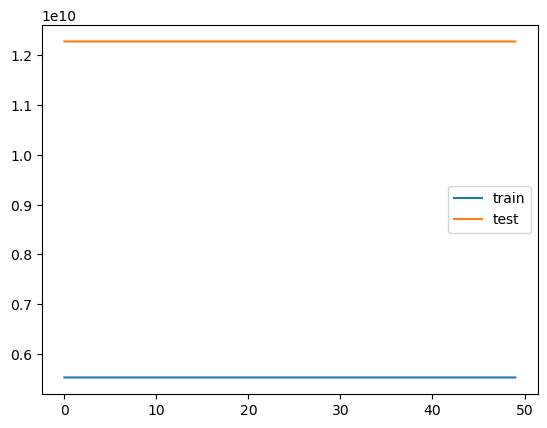

In [113]:
#Visual plot to check if the error is reducing- World
pyplot.plot(LSTMModel_fit_w.history['loss'], label='train')
pyplot.plot(LSTMModel_fit_w.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [114]:
error_Training_LSTM_w = mean_squared_error(Y_train_LSTM_w, LSTMModel_w.predict(X_train_LSTM_w))
predicted_w = LSTMModel_w.predict(X_validation_LSTM_w)
error_Test_LSTM_w = mean_squared_error(Y_validation_w, predicted_w)
error_Test_LSTM_w

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


12277083567.883797

### Overall Comparison of all the algorithms ( including Time Series Algorithms)

Grid Search uses Cross validation which isn't appropriate for the time series models such as LSTM

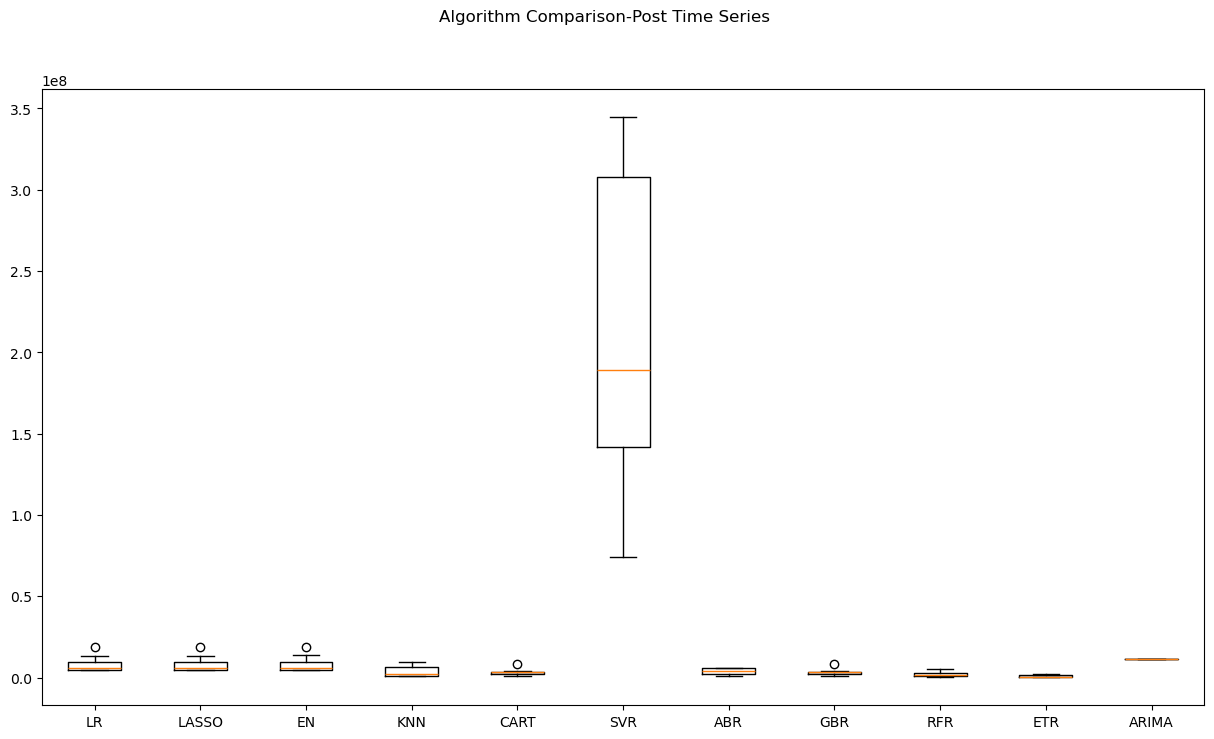

In [115]:
# compare algorithms - World
results_w.append(error_Test_ARIMA_w)
names_w.append("ARIMA")
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison-Post Time Series')
ax = fig.add_subplot(111)
pyplot.boxplot(results_w)
ax.set_xticklabels(names_w)
fig.set_size_inches(15,8)
pyplot.show()

<a id='5'></a>
# 6. Model Tuning and Grid Search
This section shown the Grid search for all the Machine Learning and time series models mentioned in the book.

<a id='5.1'></a>
### 6.1. Common Regression, Ensemble and DeepNNRegressor Grid Search


Grid Search World

In [116]:
# 8. Grid search : RandomForestRegressor - World
'''
n_estimators : integer, optional (default=10)
    The number of trees in the forest.
'''
param_grid = {'n_estimators': [5,10,20,30,40,50,100,150,200]}
model = RandomForestRegressor()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_w, Y_train_w)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1870692.509523 using {'n_estimators': 150}
-3428634.240758 (2767340.741259) with: {'n_estimators': 5}
-2800961.147358 (1738127.592834) with: {'n_estimators': 10}
-1887532.063578 (1418553.336119) with: {'n_estimators': 20}
-1934675.473958 (1420299.085370) with: {'n_estimators': 30}
-2074691.878815 (1372460.173675) with: {'n_estimators': 40}
-2042395.689961 (1431930.079450) with: {'n_estimators': 50}
-2083243.408281 (1390189.506145) with: {'n_estimators': 100}
-1870692.509523 (1098013.456027) with: {'n_estimators': 150}
-1941039.750268 (1282335.431449) with: {'n_estimators': 200}


In [117]:
# 10. Grid search : ExtraTreesRegressor - World
'''
n_estimators : integer, optional (default=10)
    The number of trees in the forest.
'''
param_grid = {'n_estimators': [10,50,100,150,200]}
model = ExtraTreesRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train_w, Y_train_w)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -905943.499741 using {'n_estimators': 100}
-1081407.219890 (588369.771660) with: {'n_estimators': 10}
-1025274.125091 (721573.822669) with: {'n_estimators': 50}
-905943.499741 (700503.150507) with: {'n_estimators': 100}
-943187.730198 (685907.961501) with: {'n_estimators': 150}
-927928.070718 (658212.486418) with: {'n_estimators': 200}


<a id='5.2'></a>
### 6.2. Grid Search- Time Series Models

In [118]:
#Grid Search for ARIMA Model - World
#Change p,d and q and check for the best result

# evaluate an ARIMA model for a given order (p,d,q)
#Assuming that the train and Test Data is already defined before
def evaluate_arima_model(arima_order):
    #predicted = list()
    modelARIMA=ARIMA(endog=Y_train_w,exog=X_train_ARIMA_w,order=arima_order)
    model_fit = modelARIMA.fit()
    #error on the test set
#     tr_len = len(X_train_ARIMA)
#     to_len = len(X_train_ARIMA) + len(X_validation_ARIMA)
#     predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_validation_ARIMA)[1:]
#     error = mean_squared_error(predicted, Y_validation)
    # error on the training set
    error = mean_squared_error(Y_train_w, model_fit.fittedvalues)
    aic = model_fit.aic
    return error, aic

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse, aic = evaluate_arima_model(order)
                    if aic < best_score:
                        error, best_score, best_cfg = mse, aic, order
                    print('ARIMA%s MSE=%.3f AIC=%.3f' % (order,mse,aic))
                except:
                    continue
    print('Best ARIMA%s MSE=%.3f AIC=%.3f' % (best_cfg, error, best_score))

# evaluate parameters
p_values = [0, 1, 2, 3]
d_values = range(0, 3)
q_values = range(0, 3)
#warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=7189928.783 AIC=769.669
ARIMA(0, 0, 1) MSE=2508170.793 AIC=730.160
ARIMA(0, 0, 2) MSE=1982982.144 AIC=722.207
ARIMA(0, 1, 0) MSE=166430260302.915 AIC=690.356
ARIMA(0, 1, 1) MSE=166430346384.055 AIC=691.823
ARIMA(0, 1, 2) MSE=166430313824.315 AIC=693.262
ARIMA(0, 2, 0) MSE=92826632.467 AIC=694.017
ARIMA(0, 2, 1) MSE=1791165.406 AIC=677.942
ARIMA(0, 2, 2) MSE=1754473.839 AIC=679.083
ARIMA(1, 0, 0) MSE=1629228.312 AIC=711.977
ARIMA(1, 0, 1) MSE=1522388.358 AIC=711.488
ARIMA(1, 0, 2) MSE=1519471.568 AIC=713.392
ARIMA(1, 1, 0) MSE=166430348306.609 AIC=691.821
ARIMA(1, 1, 1) MSE=166430365933.593 AIC=694.353
ARIMA(1, 1, 2) MSE=166430300920.758 AIC=694.941
ARIMA(1, 2, 0) MSE=2468908.486 AIC=688.313
ARIMA(1, 2, 1) MSE=1767232.555 AIC=679.396
ARIMA(1, 2, 2) MSE=1806401.196 AIC=680.958
ARIMA(2, 0, 0) MSE=1527825.572 AIC=711.677
ARIMA(2, 0, 1) MSE=1506385.799 AIC=713.139
ARIMA(2, 0, 2) MSE=1369228.895 AIC=711.774
ARIMA(2, 1, 0) MSE=166430316419.519 AIC=693.030
ARIMA(2, 1, 1) MSE

<a id='6'></a>
# 7. Finalise the Model

Let us select one of the model to finalize the data. Looking at the results for the Random Forest Model. Looking at the results for the RandomForestRegressor model

<a id='6.1'></a>
## 7.1. Results on the Test Dataset

In [119]:
# Fit model - World
# prepare model
#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)
model_w_et = ExtraTreesRegressor(n_estimators=50) # rbf is default kernel
model_w_et.fit(X_train_w, Y_train_w)

modelARIMA_w = ARIMA(endog = Y_train_w, exog = X_train_ARIMA_w, order=(0,2,1)) # Note: order is a tuple
model_fit_ARIMA_w = modelARIMA_w.fit()
# Fitting the ARIMA model
error_Training_ARIMA_cd = mean_squared_error(Y_train_w, model_fit_ARIMA_w.fittedvalues)

In [120]:
# Evaluate ARIMA Model parameters
print(model_fit_ARIMA_w.summary())

                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                   41
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -335.971
Date:                Thu, 14 Aug 2025   AIC                            677.942
Time:                        22:31:55   BIC                            682.932
Sample:                             0   HQIC                           679.732
                                 - 41                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Year          24.4914      1.963     12.475      0.000      20.643      28.339
ma.L1         -0.9033      0.097     -9.343      0.000      -1.093      -0.714
sigma2      1.741e+06   3.22e+05      5.409      0.0

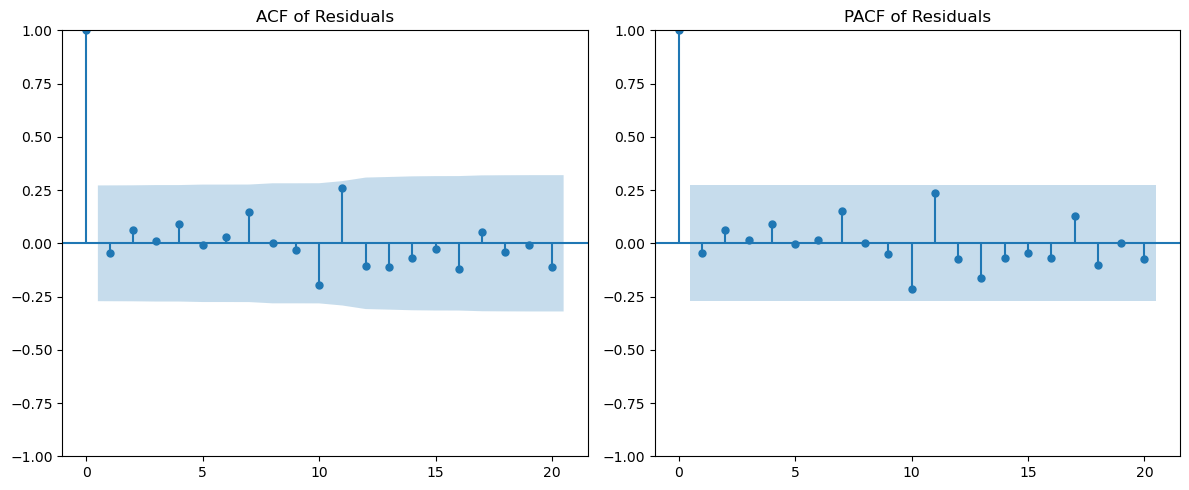

In [133]:
# Evaluate ACF and PACF
residuals = model_fit_ARIMA_w.resid

plt.figure(figsize=(12,5))
plt.subplot(121)
plot_acf(residuals, ax=plt.gca(), lags=20)
plt.title("ACF of Residuals")

plt.subplot(122)
plot_pacf(residuals, ax=plt.gca(), lags=20, method='ywm')
plt.title("PACF of Residuals")

plt.tight_layout()
plt.show()

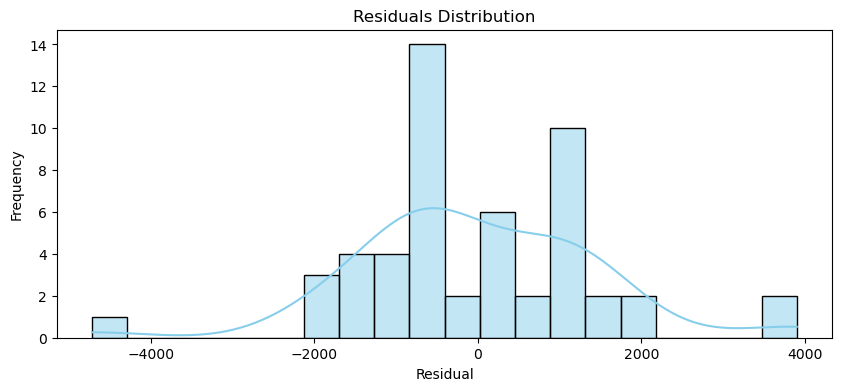

In [136]:
# Evaluate the Residuals Distribution
plt.figure(figsize=(10,4))

# Histogram + KDE
sns.histplot(residuals, kde=True, color='skyblue', bins=20)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()

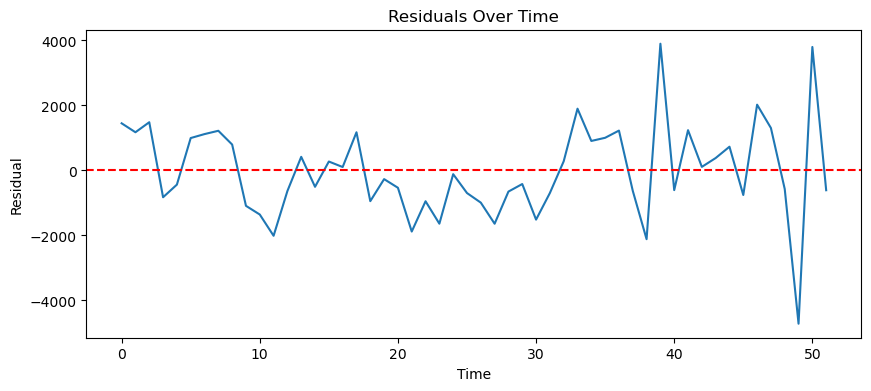

In [137]:
# Evaluate the residuals over the time
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("Residuals Over Time")
plt.xlabel("Time")
plt.ylabel("Residual")
plt.axhline(0, color='red', linestyle='--')
plt.show()

In [121]:
# estimate accuracy on validation set - World
# transform the validation dataset
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# transform the validation dataset
#rescaledValidationX = scaler.transform(X_validation)
predictions_et_w = model_w_et.predict(X_validation_w)
print('-'*50)
print('EXTRA TREES MODEL')
print('-'*50)
print('Mean Squared Error:',mean_squared_error(Y_validation_w, predictions_et_w))
print('r2 Score:', r2_score(Y_validation_w, predictions_et_w))

print('-'*50)
print('ARIMA MODEL')
print('-'*50)
predictions_arima_w = model_fit_ARIMA_w.predict(start = tr_len_w - 1, end = to_len_w - 1, exog = X_validation_ARIMA_w)[1:]
print('Mean Squared Error:',mean_squared_error(Y_validation_w, predictions_arima_w))
print('r2 Score:', r2_score(Y_validation_w, predictions_arima_w))

--------------------------------------------------
EXTRA TREES MODEL
--------------------------------------------------
Mean Squared Error: 80520779.16115049
r2 Score: -3.7100255044061132
--------------------------------------------------
ARIMA MODEL
--------------------------------------------------
Mean Squared Error: 10789480.67967525
r2 Score: 0.36887434883284953


<a id='6.2'></a>
## 7.2. Concatenate and Plot results of Fitted and Real to comparate

In [122]:
# Creating a dataframe with the fitted values of ARIMA Model - Trainning Set
fitted = pd.DataFrame({'Fitted':model_fit_ARIMA_w.fittedvalues})
comp_arima = pd.concat([X_train_ARIMA_w, Y_train_w, fitted], axis=1)
comp_arima.head()

,Year,Consumption,Fitted
0,1971,48759.010,48272.508
1,1972,51054.404,49027.520
2,1973,53542.732,52242.777
3,1974,53471.034,55143.225
4,1975,53955.820,54659.103


In [123]:
# Plotting the dataset with the Fitted Values from ARIMA to compare with the Real Values
fig = px.line(comp_arima, x= 'Year', y=['Consumption','Fitted'], color_discrete_sequence=['black', 'blue'], title="Total World Energy Consumption", height=500, width=1000)
# Loop through traces and set dash for 'Fitted'
for trace in fig.data:
    if trace.name == 'Fitted':
        trace.line.dash = 'dash'  # options: dash, dot, dashdot, etc.
fig.show()

In [124]:
# Creating a dataframe with the fitted values of ARIMA Model - Trainning Set
fitted_values_et = model_w_et.predict(X_train_w)
fitted_et = pd.DataFrame({'Fitted':fitted_values_et}, index=X_train_w.index)
comp_et= pd.concat([X_train_w, Y_train_w, fitted_et], axis=1)
comp_et.head()

,Year,Consumption,Fitted
0,1971,48759.010,48759.010
1,1972,51054.404,51054.404
2,1973,53542.732,53542.732
3,1974,53471.034,53471.034
4,1975,53955.820,53955.820


In [125]:
# Plotting the dataset with the Fitted Values from Extra Trees to compare with the Real Values
fig = px.line(comp_et, x= 'Year', y=['Consumption','Fitted'], color_discrete_sequence=['black', 'red'], title="Total World Energy Consumption", height=500, width=1000)
# Loop through traces and set dash for 'Fitted'
for trace in fig.data:
    if trace.name == 'Fitted':
        trace.line.dash = 'dash'  # options: dash, dot, dashdot, etc.
fig.show()

In [126]:
# Creating a dataframe with the values of ARIMA Model - Validation Set
ARIMA_val = pd.merge(X_validation_ARIMA_w, Y_validation_w, left_index=True, right_index=True)
ARIMA_validation = pd.merge(ARIMA_val, predictions_arima_w, left_index=True, right_index=True)
ARIMA_validation.head()

,Year,Consumption,predicted_mean
41,2012,103863.356,104475.840
42,2013,105832.875,106190.496
43,2014,107202.922,107905.152
44,2015,108156.408,109619.808
45,2016,109455.939,111334.464


In [127]:
# Plotting The Validation set of ARIMA model to evaluate the performance
fig = px.line(ARIMA_validation, x= 'Year', y=['Consumption','predicted_mean'], color_discrete_sequence=['blue', 'red'], title="Total World Energy Consumption", height=500, width=1000)
fig.show()

In [128]:
# Creating a dataframe with the fitted values of Extra Trees Model - Validation Set
fitted_values_et = model_w_et.predict(X_validation_w)
fitted_et = pd.DataFrame({'Predicted':fitted_values_et}, index=X_validation_w.index)
comp_et= pd.concat([X_validation_w, Y_validation_w, fitted_et], axis=1)
comp_et.head()

,Year,Consumption,Predicted
41,2012,103863.356,102761.184
42,2013,105832.875,102761.184
43,2014,107202.922,102761.184
44,2015,108156.408,102761.184
45,2016,109455.939,102761.184


In [129]:
# Plotting the dataset with the Fitted Values from Extra Trees to compare with the Real Values
fig = px.line(comp_et, x= 'Year', y=['Consumption','Predicted'], color_discrete_sequence=['black', 'red'], title="Total World Energy Consumption", height=500, width=1000)
# Loop through traces and set dash for 'Fitted'
for trace in fig.data:
    if trace.name == 'Predicted':
        trace.line.dash = 'dash'  # options: dash, dot, dashdot, etc.
fig.show()

<a id='6.2'></a>
## 7.2. Save Model for Later Use

In [138]:
modelARIMA_w = ARIMA(endog = Yw, exog = Xw, order=(0, 2, 1)) # Note: order is a tuple
model_fit_ARIMA_w = modelARIMA_w.fit()

In [139]:
# Save Model Using Pickle
from pickle import dump
from pickle import load

# save the model to disk
filename = 'Models/world_energy_forecast.sav'
dump(model_fit_ARIMA_w, open(filename, 'wb'))